# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## Clean up data

In [2]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [3]:
def show_distribution(var_data):
    """Function to show summary stats and distribution for a column"""

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(
        var_data.name, 
        f"\nMinimum:{min_val:.2f}\nMean:{mean_val:.2f}\nMedian:{med_val:.2f}\nMode:{mod_val:.2f}\nMaximum:{max_val:.2f}\n"
    )

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel("Frequency")

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = "gray", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=mean_val, color = "cyan", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=med_val, color = "red", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=mod_val, color = "yellow", linestyle="dashed", linewidth = 2)
    ax[0].axvline(x=max_val, color = "gray", linestyle="dashed", linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel("Value")

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

house_age 
Minimum:0.00
Mean:17.71
Median:16.10
Mode:0.00
Maximum:43.80

transit_distance 
Minimum:23.38
Mean:1083.89
Median:492.23
Mode:289.32
Maximum:6488.02

local_convenience_stores 
Minimum:0.00
Mean:4.09
Median:4.00
Mode:0.00
Maximum:10.00

latitude 
Minimum:24.93
Mean:24.97
Median:24.97
Mode:24.97
Maximum:25.01

longitude 
Minimum:121.47
Mean:121.53
Median:121.54
Mode:121.54
Maximum:121.57

price_per_unit 
Minimum:7.60
Mean:37.98
Median:38.45
Mode:24.70
Maximum:117.50



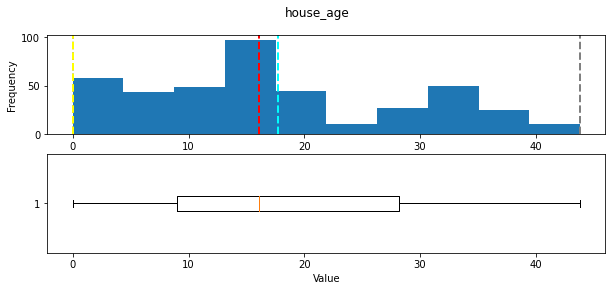

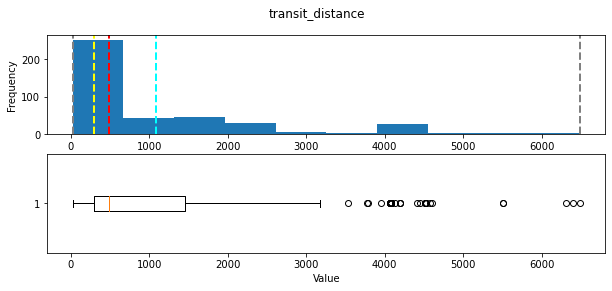

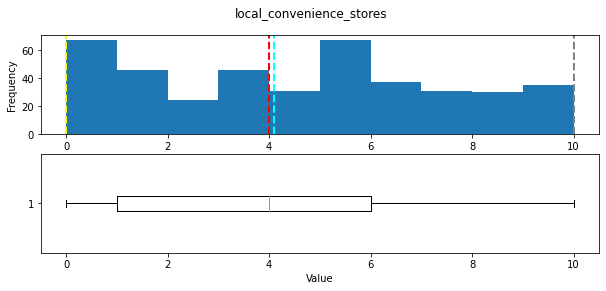

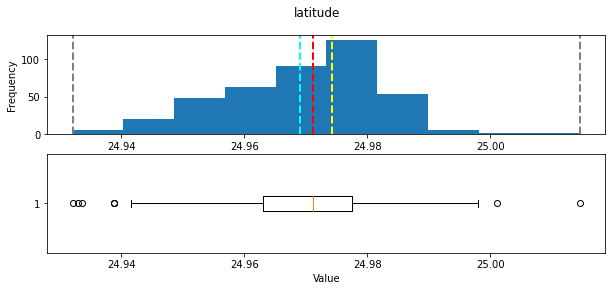

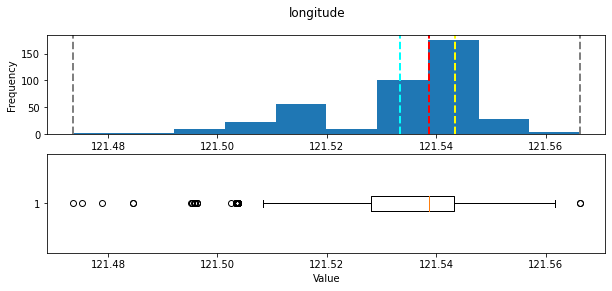

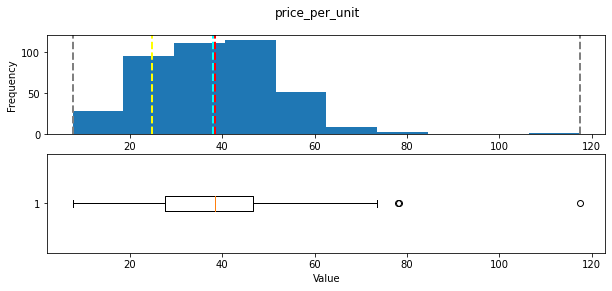

In [4]:
numeric_columns = ["house_age", "transit_distance", "local_convenience_stores", "latitude", "longitude", "price_per_unit"]
for col in numeric_columns:
    show_distribution(data[col])

In [5]:
print("Data shape before removing outliers", data.shape)

Data shape before removing outliers (414, 7)


In [6]:
for col in numeric_columns:
    col_01pcntile = data[col].quantile(0.01)
    col_90pcntile = data[col].quantile(0.90)
    data = data[(data[col] < col_90pcntile) & (data[col] > col_01pcntile)]

In [7]:
print("Data shape after removing outliers", data.shape)

Data shape after removing outliers (151, 7)


house_age 
Minimum:1.00
Mean:16.10
Median:15.00
Mode:4.00
Maximum:34.60

transit_distance 
Minimum:104.81
Mean:883.42
Median:492.23
Mode:492.23
Maximum:2469.64

local_convenience_stores 
Minimum:1.00
Mean:4.23
Median:4.00
Mode:3.00
Maximum:7.00

latitude 
Minimum:24.95
Mean:24.97
Median:24.97
Mode:24.97
Maximum:24.98

longitude 
Minimum:121.51
Mean:121.53
Median:121.54
Mode:121.54
Maximum:121.55

price_per_unit 
Minimum:21.30
Mean:36.22
Median:37.30
Mode:42.50
Maximum:51.80



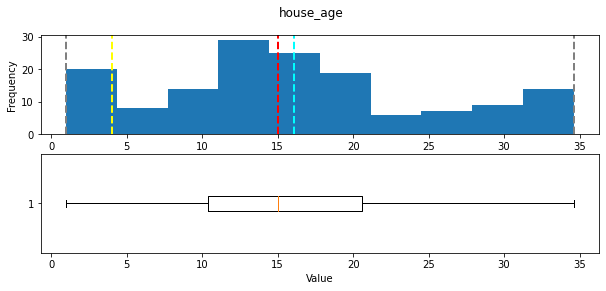

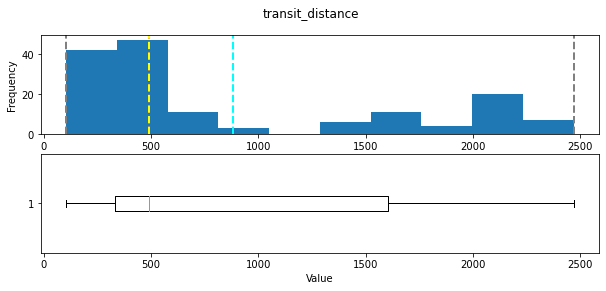

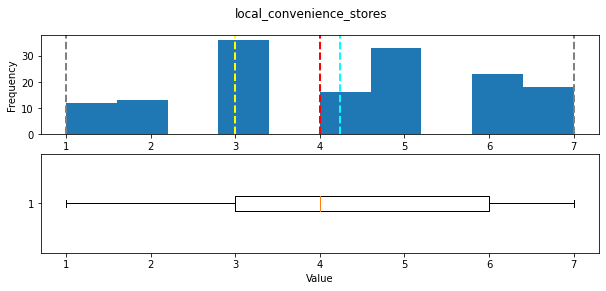

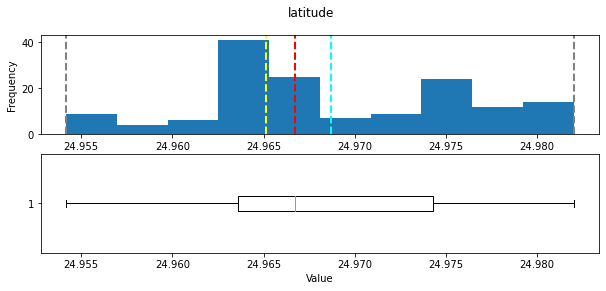

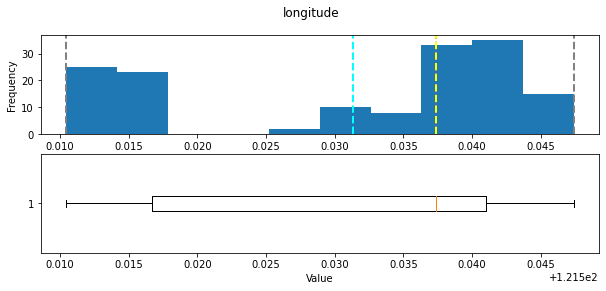

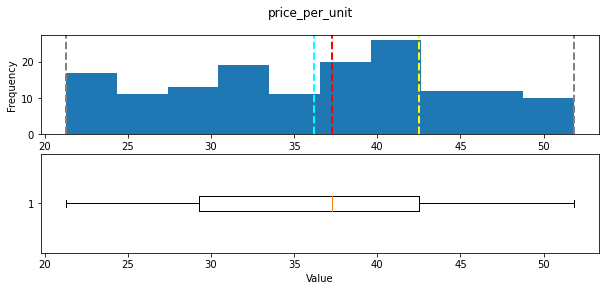

In [8]:
for col in numeric_columns:
    show_distribution(data[col])

## Test features-label correlations

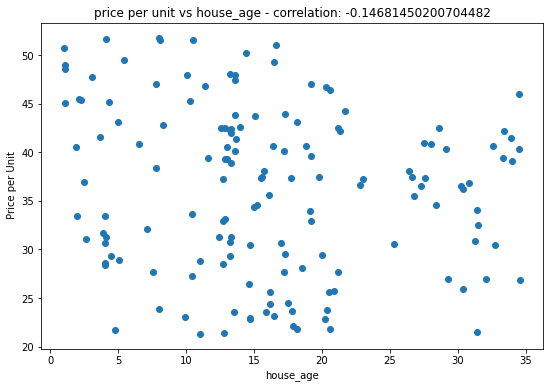

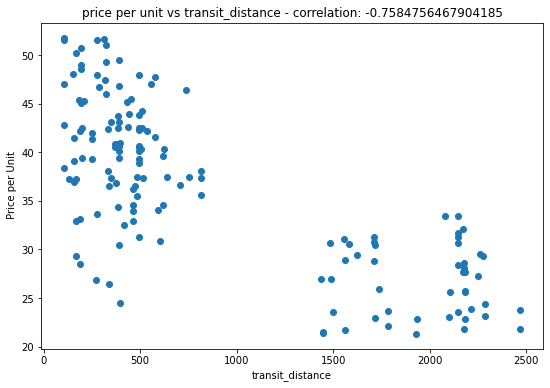

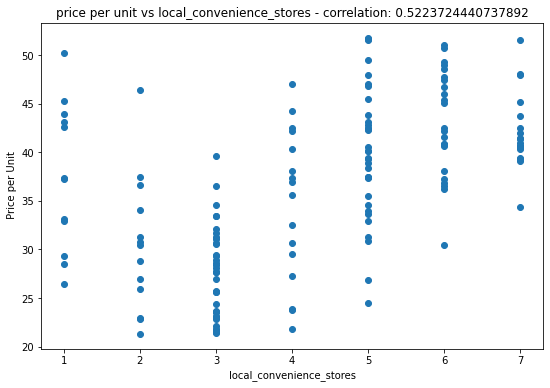

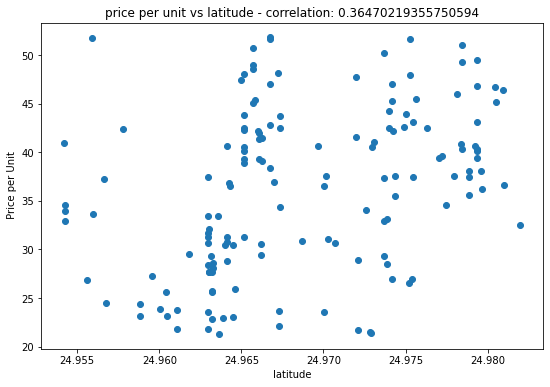

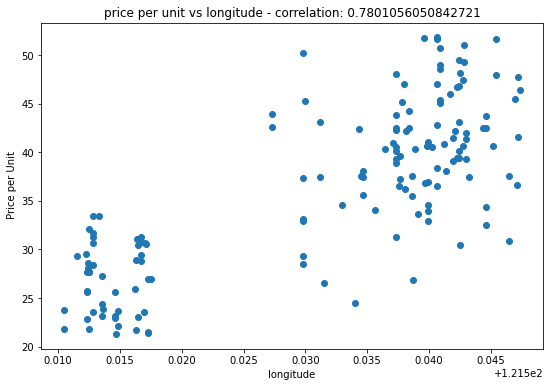

In [9]:
numeric_features = ["house_age", "transit_distance", "local_convenience_stores", "latitude", "longitude"]

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data["price_per_unit"]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel(" Price per Unit")
    ax.set_title(f"price per unit vs {col} - correlation: {correlation}")
plt.show()

## Split data for training

In [10]:
features_to_use = ["house_age", "transit_distance", "local_convenience_stores", "latitude", "longitude"]
label = "price_per_unit"

X, y = data[features_to_use].values, data[label].values

# 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(f"Training Set: {X_train.shape[0]} rows\nTest Set: {X_test.shape[0]} rows")

Training Set: 105 rows
Test Set: 46 rows


## Create the model

In [11]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0, 1, 2, 3, 4]
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ])

In [12]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
])

## Train the model

In [13]:
# Train the model using the created pipeline
model = pipeline.fit(X_train, (y_train))

In [14]:
print(model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4])],
                                   verbose=False)),
                ('regressor',
                 RandomForestRegressor

## Evaluate the model

In [15]:
# Get predictions using the test set
predictions = model.predict(X_test)

In [16]:
# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 25.053520625863563
RMSE: 5.005349201191018
R2: 0.5613506358137088


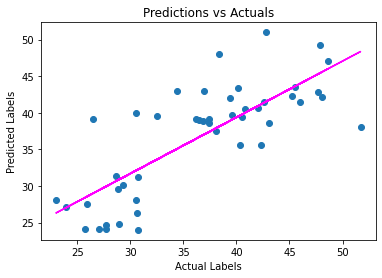

In [17]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [18]:
# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

['./real_estate_model.pkl']

In [19]:
# Load the model from the file
loaded_model = joblib.load(filename)

In [20]:
# New data to use the model on
X_new = np.array([
    [16.2,289.3248,5,24.98203,121.54348],
    [13.6,4082.015,0,24.94155,121.5038]
])

In [21]:
# Get predictions using the new data
predictions = loaded_model.predict(X_new)

In [22]:
print("Predictions:")
for prediction in predictions:
    print(round(prediction, 2))

Predictions:
46.78
26.79
